In [1]:
using Distributions, Random, KernelFunctions, LinearAlgebra
using Plots, Revise
include("helperfunctions.jl")

gppredict (generic function with 1 method)

## Generate Data

In [101]:
## Create data
Random.seed!(12781)
x_axes = collect(0:0.01:10)
niter = 20
# σ_noise = 0.4
N =2 #number of sample points

f(x) = sin.(3*x) + cos.(2*x)
y_true = f(x_axes)

#randomly sample data points
pos = sort(randperm(length(x_axes))[1:N]) 
x_data = x_axes[pos]
y_data = y_true[pos] #+ σ_noise*randn(length(pos)); 

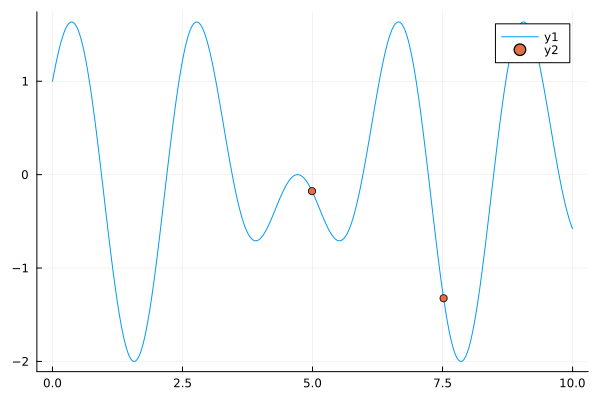

In [102]:
#visualize the true process and the data
plot(x_axes, y_true)
scatter!(x_data, y_data)

# Perform Bayesian Optimization 

In [103]:
#we should create a model for the function
kernelfunc = with_lengthscale(Matern52Kernel(), 1.)
meanfunc = (x) -> 0.0
Kff = kernelmatrix(kernelfunc,x_axes,x_axes) + 1e-6 * Diagonal(ones(length(x_axes)));

In [104]:
μ_store = [];
σ_store = [];
y_acquisition_store = [];
new_pos_store = [];

In [105]:
include("helperfunctions.jl")

gppredict (generic function with 1 method)

In [106]:
#fix the condition a bit
for i=1:niter
    μ, Σ = gppredict(x_data, y_data, x_axes, meanfunc, kernelfunc, Kff)
    #####
    y_acquisition = PI_acquisition(μ, Σ, y_data, 0.0)
    #####
    #sample the function value at new position
    new_pos = findall(x -> x==maximum(y_acquisition), y_acquisition) 
    y_data_new = y_true[new_pos[1]] #+ σ_noise*randn()

    #add new data to dataset
    push!(x_data, x_axes[new_pos[1]])
    push!(y_data, y_data_new)
    push!(μ_store,μ)
    push!(σ_store, sqrt.(diag(Σ) .+ 1e-6))
    push!(y_acquisition_store, y_acquisition)
    push!(new_pos_store, new_pos[1])
end

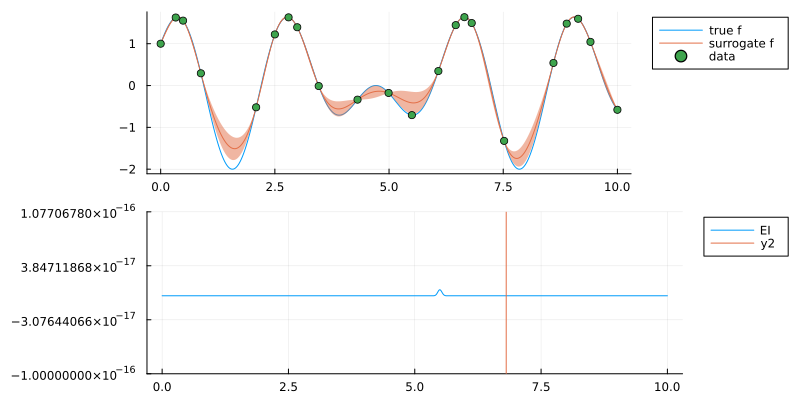

In [107]:
p1 = plot(x_axes,y_true, label = "true f")
plot!(x_axes,μ_store[end], ribbon=σ_store[end], label = "surrogate f")
scatter!(x_data, y_data, label = "data", legend = :outertopright)

p2 = plot(x_axes,y_acquisition_store[end], label="EI", legend = :outertopright)
plot!([x_axes[new_pos_store[15]]], seriestype = :vline)

plot(p1,p2, layout = (2,1), size=(800,400))

Plots.AnimatedGif("C:\\Users\\LENOVO\\AppData\\Local\\Temp\\jl_InGW5RJ2Bd.gif")
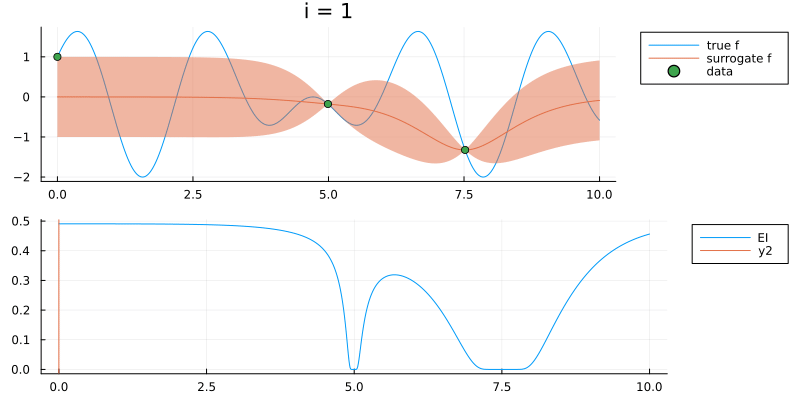

In [108]:

anim = Animation()
for i in 1:niter
    p1 = plot(x_axes,y_true, label = "true f", title="i = $(i)")
    plot!(x_axes,μ_store[i], ribbon=σ_store[i], label = "surrogate f")
    scatter!(x_data[1:(length(x_data)-niter+i)], y_data[1:(length(x_data)-niter+i)], label = "data", legend = :outertopright)
    
    p2 = plot(x_axes,y_acquisition_store[i], label="EI", legend = :outertopright)
    plot!([x_axes[new_pos_store[i]]], seriestype = :vline)
    
    plot(p1,p2, layout = (2,1), size=(800,400))
    frame(anim)
end
gif(anim; show_msg=false, fps=1)

## Do BO for 2 dimensions

In [ ]:
observations = data; 
Xu;

x1_axes = 100; #number of points on the first axis  
x2_axes = 100; #number of points on the second axis
M = Nu_x1 * Nu_x2; #total number of inducing points 
Xu_grid =  vec(collect(Iterators.product(range(-10,10;length=Nu_x1), range(-10,10;length=Nu_x2))))
Xu = [[i...] for i in Xu_grid] # a set of inducing points